<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Previsao_aniversario_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Births Forecasting with Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('/content/daily-total-female-births-CA.csv')

In [3]:
base.shape

(365, 2)

In [4]:
base.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


no modelo do alagorito do facebook prophet é de costume usr os nomes das colunas  como "ds" e "y"

In [5]:
base.columns = ['ds', 'y']

In [6]:
base.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

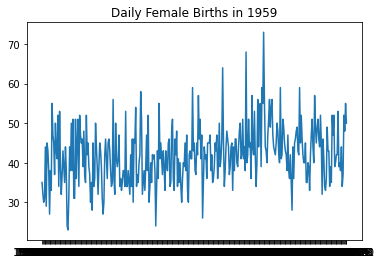

In [10]:
plt.plot(base['ds'], base['y']);
plt.title('Daily Female Births in 1959')

criarei uma instância do facebook prophet para aplicar os efeitos de sazonalidade para a tarefa de previsão de nascimentos diários com Machine Learning

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False, 
                          changepoint_range=0.9, 
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(base)
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


visualizar agora

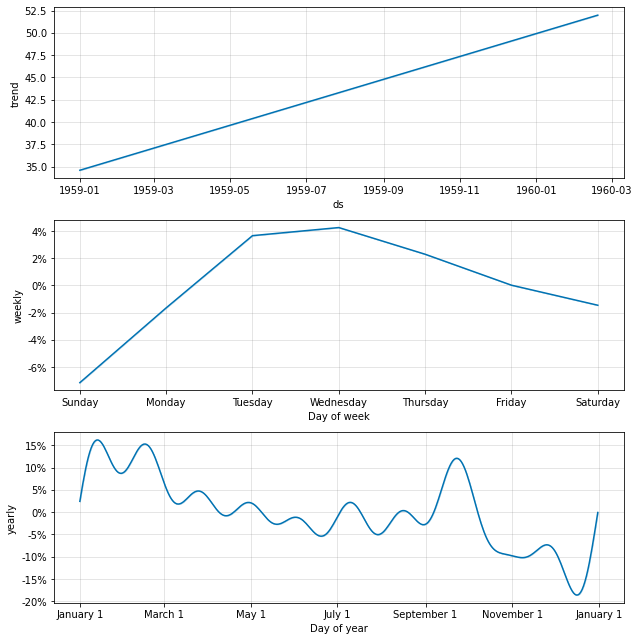

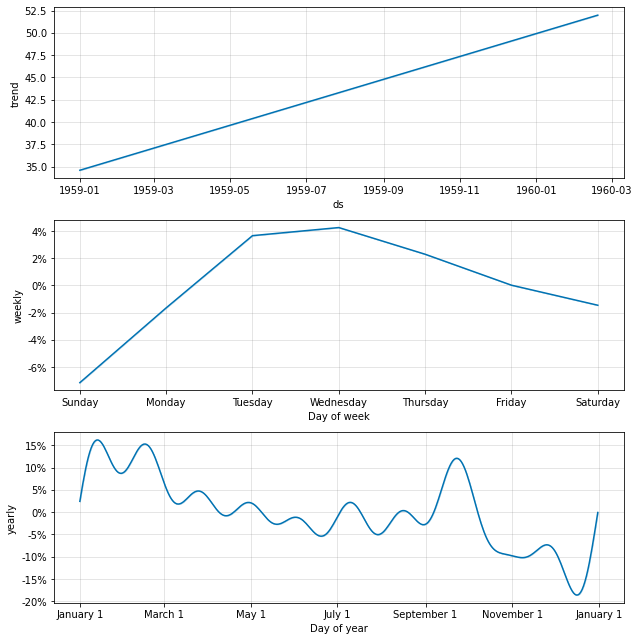

In [13]:
m.plot_components(forecast)

agora podemos visualizar as previsoes feitas pelo modelo Facebook Prophet

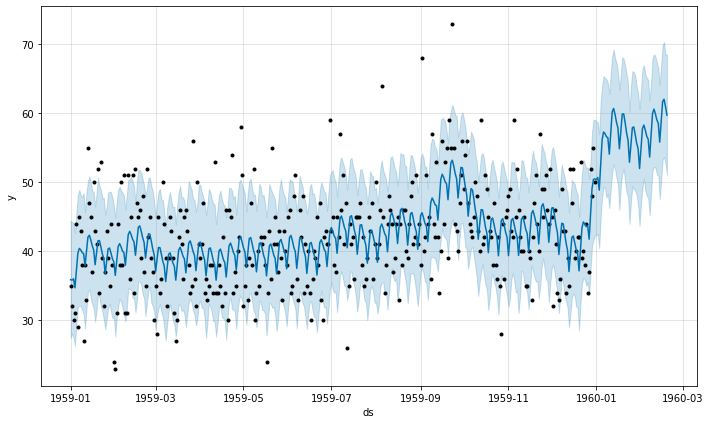

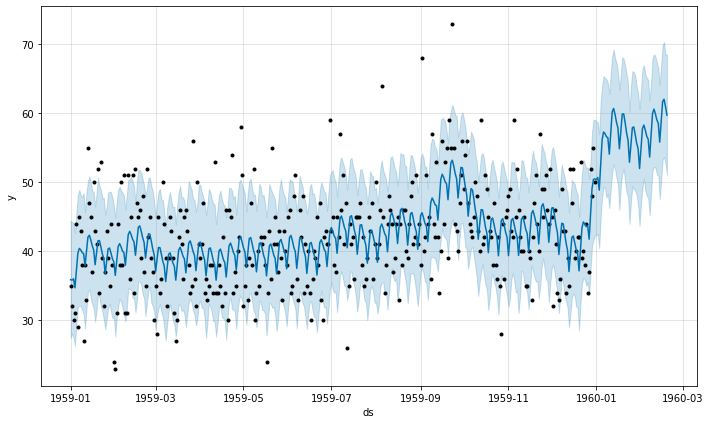

In [14]:
m.plot(forecast)